PPCA lavora con più variabili osservabili anzichè una sola

In [1]:
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt
import aesara.tensor as at
import arviz as az
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
from scipy import stats
import scipy

WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
scaler = StandardScaler()

In [3]:
data = np.load('prova.npy', allow_pickle=True).item()

# extract data social anxiety

In [4]:
import pandas as pd

In [32]:
#csv_ = '/Users/marcoghezzi/PycharmProjects/pythonProject/osfstorage-archive/behavior/LookAtMe_002.csv'
csv_ = '/home/paolo/matteo/matteo/unimi/tesi_master/code/osfstorage-archive/behavior/LookAtMe_002.csv'
global_data = pd.read_csv(csv_, sep='\t')
y = np.array(list([int(d>2) for d in global_data['rating']]))
e_labels = y[:,np.newaxis]  # rating > 2

In [33]:
e_labels = e_labels[1]

print(e_labels)

[1]


In [35]:
N_e = 1
D_e = 1 #e_labels.shape[1]
print(N_e,D_e)

1 1


## test with new data

In [36]:
import deepemogp.feature_extractor as feature_extractor
import deepemogp.signal.physio as physio
import deepemogp.signal.face as face
import deepemogp.signal.annotation as annotation
import deepemogp.datasets as datasets
import deepemogp.signal.behavior as behavior

# from: https://github.com/SheffieldML/GPy
#import GPy
# from: https://github.com/SheffieldML/PyDeepGP
#import deepgp

import pandas as pd
import numpy as np

show = False
# definition of the feature extractors to be used later
f2 = feature_extractor.FE('wavelet', window=(2, 1))
f3 = feature_extractor.FE('mean', window=(1,0))

# definition of the physiological signals to be extracted
eda_ = physio.EDA(f2)
hr_ = physio.HR(f2)
pupil_ = behavior.PUPIL(f3)

# definition of the emotional annotation to be extracted
#va = annotation.VA('valence', f3)
#ar = annotation.VA('arousal', f3)
# extraction of the desired data from the dataset
d = datasets.FEAR(signals={hr_,pupil_,eda_}, subjects={'2_69'})

for s in d.signals:
    # preprocess ...
    #s.preprocess(show=show)


    #add feature extraction for eda before preprocessing

    # ... and extract features from each signal type
    s.feature_ext.extract_feat_without_preprocess(s, show=show)

for sig in d.signals:
    if sig.name=='EDA':
        eda_data = sig.features
    if sig.name=='HR':
        hr_data = sig.features
    if sig.name=='PUPIL':
        pupil_data = sig.features

>> Loading HR for subject 2 and session 69 from dataset FEAR
>> Loading PUPIL for subject 2 and session 69 from dataset FEAR
>> Loading EDA for subject 2 and session 69 from dataset FEAR
>> Extracting wavelet features from HR signal, adopting (2, 1) window ...
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000
>> Extracting mean features from PUPIL signal, adopting (1, 0) window ...
>> Extracting wavelet features from EDA signal, adopting (2, 1) window ...
params: 
1000
params: 
1000
params: 
1000
params: 
1000
params: 
1000


In [37]:
for sig in d.signals:
    print (sig.name)
    print (sig.features)

HR
         0         1         2         3         4         5         6   \
0 -1.214719 -0.969489 -1.794818 -0.130028  0.648658 -1.278176  0.655360   
1  2.978765  3.028443  3.454952  1.468468 -0.603029  0.742600 -0.289749   
2 -0.786910 -0.700728 -0.907563 -0.142147  0.700752 -0.470463 -0.046469   
3 -1.539465 -1.560444 -1.752965 -0.468737 -0.789217 -0.077583  0.669867   
4 -1.208558 -1.196978 -1.151932 -1.304946  0.252191  0.745649 -1.251371   

         7         8         9         10        11  
0 -0.065799 -0.345131  0.717082 -0.309098 -0.737570  
1 -0.124492  0.737946 -0.706377  0.599640 -1.646102  
2  0.712655 -0.892832 -0.011727  0.577033 -1.191729  
3 -1.193513  0.529042  0.386148 -0.665355 -1.387225  
4  0.803481  0.048910 -0.673520  0.016190  2.805684  
PUPIL
          0
0  2.185375
1  2.118858
2  2.136183
3  2.079833
4  2.187946
EDA
          0          1          2          3          4          5   \
0  52.372858  52.373068  52.373024  52.373469  52.335018  52.305789  

In [38]:
list(d.signals)[0].name
d.signals

{<deepemogp.signal.physio.eda.EDA at 0x7f0f5b8f4e20>,
 <deepemogp.signal.behavior.pupil.PUPIL at 0x7f0f5b9e3a90>}

In [39]:
hr_data

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.214719,-0.969489,-1.794818,-0.130028,0.648658,-1.278176,0.655360,-0.065799,-0.345131,0.717082,-0.309098,-0.737570
1,2.978765,3.028443,3.454952,1.468468,-0.603029,0.742600,-0.289749,-0.124492,0.737946,-0.706377,0.599640,-1.646102
2,-0.786910,-0.700728,-0.907563,-0.142147,0.700752,-0.470463,-0.046469,0.712655,-0.892832,-0.011727,0.577033,-1.191729
3,-1.539465,-1.560444,-1.752965,-0.468737,-0.789217,-0.077583,0.669867,-1.193513,0.529042,0.386148,-0.665355,-1.387225
4,-1.208558,-1.196978,-1.151932,-1.304946,0.252191,0.745649,-1.251371,0.803481,0.048910,-0.673520,0.016190,2.805684


In [40]:
pupil_data

,0
0,2.185375
1,2.118858
2,2.136183
3,2.079833
4,2.187946


In [41]:
eda_data

,0,1,2,3,4,5,6,7,8,9,10,11
0,52.372858,52.373068,52.373024,52.373469,52.335018,52.305789,52.256786,52.204764,52.176726,52.139661,52.100657,52.068768
1,52.200643,52.200316,52.201886,52.198329,52.179811,52.144084,52.102209,52.075830,52.041313,52.000949,51.972272,51.957414
2,52.090472,52.090270,52.092770,52.082971,52.044593,52.003749,51.978195,51.943153,51.928658,51.907129,51.858105,51.874538
3,51.958329,51.957968,51.960691,51.948989,51.928686,51.909852,51.867218,51.845860,51.807876,51.790403,51.795388,51.809608
4,51.869931,51.869535,51.873047,51.859766,51.811386,51.790052,51.794325,51.808952,51.841047,51.858602,51.833599,51.803676


## end test

prendo un'implementazione di sppca e la applico al nostro caso

different types of observable data

1) gaze
2) fisio
    2.1) heart rate variability
    2.2) eda phasic value
3) social anxiety
4) aspettativa del dolore

In [42]:
pupil = pupil_data
hr = hr_data
eda = eda_data
'''social_anx = data['social anxiety'][:,np.newaxis]
pain_exp = data['pain expectation'][:,np.newaxis]'''


"social_anx = data['social anxiety'][:,np.newaxis]\npain_exp = data['pain expectation'][:,np.newaxis]"

In [43]:
print(pupil.shape)
print(hr.shape)
print(eda.shape)

(5, 1)
(5, 12)
(5, 12)


In [44]:
N_pupil = pupil.shape[0]
D_pupil = pupil.shape[1]

N_hr = hr.shape[0]
D_hr = hr.shape[1]

N_eda = eda.shape[0]
D_eda = eda.shape[1]
K = 1

print(N_pupil,D_pupil)
print(N_hr,D_hr)
print(N_eda,D_eda)

5 1
5 12
5 12


In [47]:
with pm.Model() as sPPCA:
    #dati osservabili
    hr_data = pm.MutableData("hr_data", hr.T)
    pupil_data = pm.MutableData("pupil_data", pupil.T)
    eda_data = pm.MutableData("eda_data", eda.T)

    e_data = pm.ConstantData("e_data", e_labels)

    #matrici pesi
    Whr = pm.Normal('Whr', mu=at.zeros([D_hr, K]), sigma=2.0 * at.ones([D_hr, K]), shape=[D_hr, K])
    Wpupil = pm.Normal('Wpupil', mu=at.zeros([D_pupil, K]), sigma=2.0 * at.ones([D_pupil, K]), shape=[D_pupil, K])

    Weda = pm.Normal('Weda', mu=at.zeros([D_eda, K]), sigma=2.0 * at.ones([D_eda, K]), shape=[D_eda, K])

    #weight matrix for pain expectation.
    #check mu,sigma,shape
    We = pm.Normal('W_e', mu=at.zeros([D_e, K]), sigma=2.0 * at.ones([D_e,K]), shape=[D_e, K])

    #latent space
    c = pm.Normal('c', mu=at.zeros([N_hr,K]), sigma=at.ones([N_hr,K]), shape=[N_hr,K])

    # dati dell'hrv interpretati come una gaussiana
    x_hr = pm.Normal('x_hr', mu=Whr.dot(c.T), sigma=at.ones([D_hr,N_hr]) ,shape=[D_hr, N_hr], observed=hr_data)
    # dati della dilatazione pupille interpretati come una gaussiana
    x_pupil = pm.Normal('x_pupil', mu=Wpupil.dot(c.T), sigma=at.ones([D_pupil, N_pupil]), shape=[D_pupil, N_pupil], observed=pupil_data)
    #eda
    x_eda = pm.Normal('x_eda',mu=Weda.dot(c.T),sigma= at.ones([D_eda,N_pupil]), shape=[D_eda,N_eda], observed=eda_data)

    # pain expectation. ciò che dovremmo inferire dato c
    # due strade: binary o multiclass (1-4)
    # p = probability of success?
    x_e = pm.Bernoulli('x_e' , p=pm.math.sigmoid(We.dot(c.T)) , shape =[D_e], observed=e_data)

    #x_hr = pm.Bernoulli('x_hr', p=pm.math.sigmoid(Whr.dot(c.T)), shape=[D_hr, N_hr], observed=hr_data)
    #x_eda = pm.Bernoulli('x_eda', p=pm.math.sigmoid(Weda.dot(c.T)), shape=[D_eda, N_eda], observed=eda_data)

In [48]:
gv = pm.model_to_graphviz(sPPCA)
gv.view()

'.gv.pdf'

In [49]:
sPPCA.free_RVs

[Whr ~ N(f(), f()),
 Wpupil ~ N(f(), f()),
 Weda ~ N(f(), f()),
 W_e ~ N(f(), f()),
 c ~ N(f(), f())]

In [50]:
with sPPCA:
    trace = pm.sample(1000,init='advi+adapt_diag',chains=1,progressbar=True)

Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


Convergence achieved at 38100
Interrupted at 38,099 [19%]: Average Loss = 31,517
Sequential sampling (1 chains in 1 job)
NUTS: [Whr, Wpupil, Weda, W_e, c]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 60 seconds.


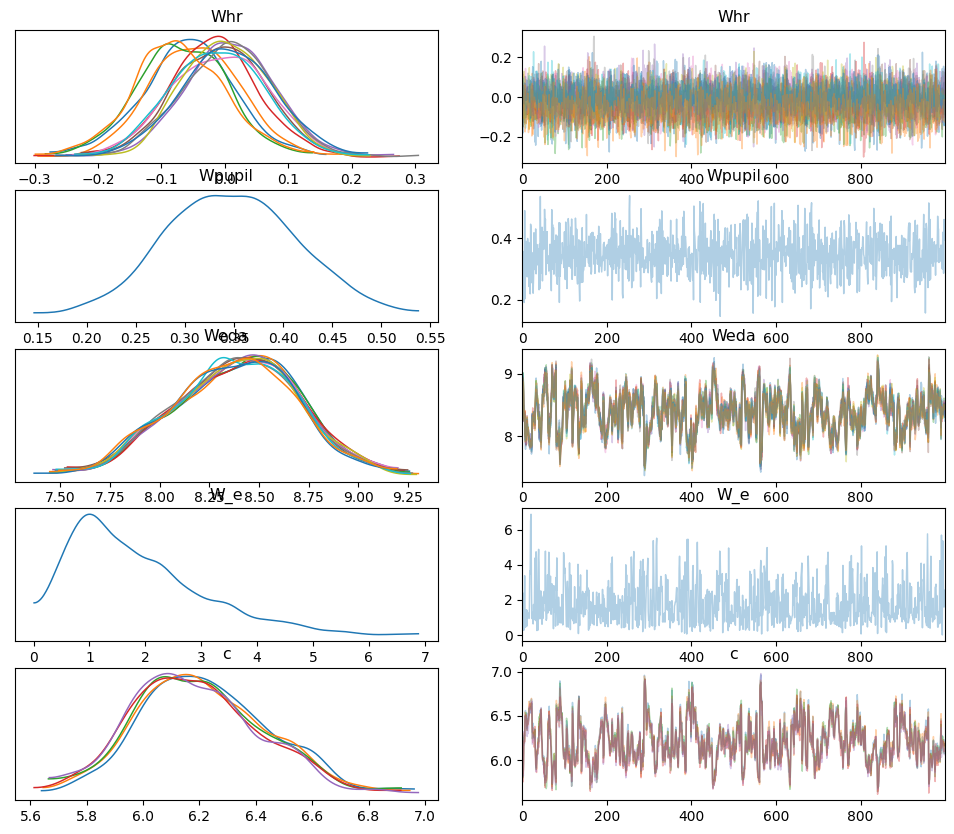

In [51]:
#az.plot_posterior(mean_field.sample(1000), color="LightSeaGreen")
az.plot_trace(trace)
plt.show()

In [53]:
with sPPCA:
    # update values of predictors:
    #pm.set_data({"gaze_data": pupil})
    # use the updated values and predict outcomes and probabilities:
    posterior_predictive = pm.sample_posterior_predictive(
        trace, random_seed=123)
hr_pred = posterior_predictive.posterior_predictive["x_e"]

Sampling: [x_e, x_eda, x_hr, x_pupil]


ValueError: size does not match the broadcast shape of the parameters. (1,), (1,), (5,)
Apply node that caused the error: bernoulli_rv{0, (0,), int64, True}(RandomGeneratorSharedVariable(<Generator(PCG64) at 0x7F0F5C57EAC0>), TensorConstant{(1,) of 1}, TensorConstant{4}, Elemwise{Sigmoid}[(0, 0)].0)
Toposort index: 19
Inputs types: [RandomGeneratorType, TensorType(int64, (1,)), TensorType(int64, ()), TensorType(float64, (1, None))]
Inputs shapes: ['No shapes', (1,), (), (1, 5)]
Inputs strides: ['No strides', (8,), (), (40, 8)]
Inputs values: [Generator(PCG64) at 0x7F0F5C57EAC0, array([1]), array(4), array([[0.9999979 , 0.99999803, 0.99999777, 0.99999763, 0.99999798]])]
Outputs clients: [['output'], ['output']]

HINT: Re-running with most Aesara optimizations disabled could provide a back-trace showing when this node was created. This can be done by setting the Aesara flag 'optimizer=fast_compile'. If that does not work, Aesara optimizations can be disabled with 'optimizer=None'.
HINT: Use the Aesara flag `exception_verbosity=high` for a debug print-out and storage map footprint of this Apply node.

In [ ]:
pupil

In [ ]:
print(hr_pred[0])

In [ ]:
print(hr_pred[0].shape)

In [ ]:
print(float(np.mean(hr_pred[0])))

median abs deviation prb is not the optimal solution

In [ ]:
hr_pred_mean = (stats.median_abs_deviation(hr_pred[0]))[0]
hr_pred_mean

In [ ]:
hr[0]

In [ ]:
#hr_pred_mode= pd.Series([0.006,0.01,0.02,0.003])

hr and hr_pred_mode devono avere same shape

In [ ]:
train_accuracy_hr = (np.subtract(hr[0], hr_pred_mean))
print('\n\t avg distance hr: \n' + str(train_accuracy_hr))
#print(' ')

In [ ]:
with sPPCA:
    # update values of predictors:
    pm.set_data({"hr_data": hr})
    # use the updated values and predict outcomes and probabilities:
    posterior_predictive = pm.sample_posterior_predictive(
        trace, random_seed=123)
    gaze_pred = posterior_predictive.posterior_predictive["x_gaze"]

In [ ]:
gaze_pred

In [ ]:
gaze_pred_mean = np.mean(gaze_pred, axis=0).T.reshape(-1)
gaze_true = pupil.reshape(-1)
reconstructed_r2 = metrics.r2_score(gaze_true, gaze_pred_mean)

print('\n\tReconstructed X R2 score: ' + str(reconstructed_r2))

In [ ]:
import deepemogp.feature_extractor as feature_extractor

In [ ]:
f = feature_extractor.FE('wavelet', window=(8,6), params={'w_mother':'db3','w_maxlev':1})

In [ ]:
x = [3, 7, 1, 1, -2, 5, 4, 6]

In [ ]:
f.apply(x)